In [ ]:
import glob, os, re

In [ ]:
# path to working directory
root = os.getcwd()
print root# print(root) for Py3 because print has become a function

# path to data directory
dpath = os.path.join(root,"DATA","INAUG")

print os.listdir(dpath)

### Preprocessing element
Functions for import and mininal cleaning of texts 

In [ ]:
def read_txt(path):
    """
    Read all plain text files in directory on path
    """
    fnames = sorted(glob.glob(os.path.join(path,"*.txt")))
    data = []
    metadata = []
    for fname in fnames:
        with open(fname, 'r') as f:
            data.append(f.read())
        metadata.append(os.path.basename(fname).split(".")[0])
    return data, metadata

def clean(s):
    """
    Remove number and casefold string s
    """
    return re.sub(r"\d","",s.lower())

Apply function to import and clean texts

In [ ]:
texts, titles = read_txt(dpath)
texts = map(clean,texts)
# texts = list(map(clean,texts))# for py 3

textsnonumber = []
for text in texts:
    textsnonumber.append(clean(text))


## and scikit-learn happens ##
import vectorizer and model object

In [8]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

Transform texts to vector space

In [10]:
vectorizer = CountVectorizer(max_df = 0.95, min_df = 0.01, 
                             max_features = 500, stop_words = 'english',
                            encoding = 'ascii', ngram_range = (1,1))

X = vectorizer.fit_transform(texts)
vocab = vectorizer.get_feature_names()
X.shape
print vocab[:10]# print first 10 features

[u'ability', u'able', u'abroad', u'accept', u'act', u'action', u'acts', u'administration', u'advance', u'affairs']


## train model ##

In [11]:
k = 5
mdl1 = LatentDirichletAllocation(n_topics = k, max_iter = 100, 
                                 random_state = 1234, 
                                 learning_method = 'online').fit(X)

### explore the model ###
Display 10 most relevant words for each topic

In [12]:
def display_topics(model, feature_names, no_top_words = 10):
    for topic_idx, topic in enumerate(model.components_):
        print "Topic {}".format(topic_idx)
        print " ".join([feature_names[i] for i in topic.argsort()
                        [:-no_top_words-1:-1]])
        
#vocab = vectorizer.get_feature_names()
#print len(vocab)

display_topics(mdl1, vocab)

Topic 0
world nation new america freedom peace government let time great
Topic 1
government states great world union power time shall citizens public
Topic 2
government states country shall great public constitution citizens power union
Topic 3
government states country shall power constitution public nation great citizens
Topic 4
government shall nation states peace world life men america years


In [13]:
grid = range(2,20)
out = []
for k in grid:
    tmp_mdl = LatentDirichletAllocation(n_topics = k, max_iter = 100, 
                                 random_state = 1234, 
                                 learning_method = 'online').fit(X)
    print(k)
    out.append(round(tmp_mdl.perplexity(X),2))





2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


Plot result

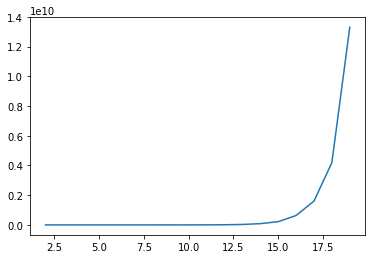

In [17]:
import matplotlib.pyplot as plt

plt.plot(grid,out)
plt.show()
plt.close()